In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import cifar100 
(x_train,y_train),(x_test,y_test)= cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

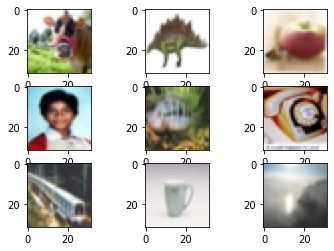

In [ ]:
import matplotlib.pyplot as plt
for i in range (9):
    plt.subplot(330+i+1) # 3 hàng, 3 cột
    plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Conv2D(64,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Conv2D(128,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr = 0.01,momentum = 0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from keras.backend import categorical_crossentropy
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=100,batch_size = 64,validation_data=(x_test,y_test),verbose = 1)

Epoch 1/100
782/782 [==============================] - 18s 9ms/step - loss: 4.1350 - accuracy: 0.0716 - val_loss: 3.6387 - val_accuracy: 0.1486
Epoch 2/100
782/782 [==============================] - 6s 8ms/step - loss: 3.3491 - accuracy: 0.1940 - val_loss: 3.0775 - val_accuracy: 0.2436
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 2.8962 - accuracy: 0.2805 - val_loss: 2.7532 - val_accuracy: 0.3099
Epoch 4/100
782/782 [==============================] - 6s 8ms/step - loss: 2.5553 - accuracy: 0.3443 - val_loss: 2.5768 - val_accuracy: 0.3547
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 2.2641 - accuracy: 0.4074 - val_loss: 2.4979 - val_accuracy: 0.3717
Epoch 6/100
782/782 [==============================] - 7s 8ms/step - loss: 2.0320 - accuracy: 0.4599 - val_loss: 2.3618 - val_accuracy: 0.3926
Epoch 7/100
782/782 [==============================] - 7s 8ms/step - loss: 1.8463 - accuracy: 0.5007 - val_loss: 2.4181 - val_accuracy: 0.391

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


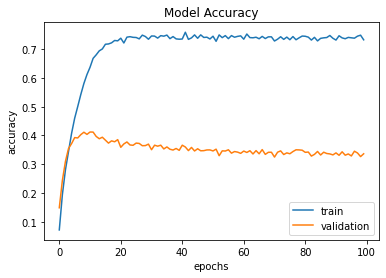

In [ ]:
model.save('finalCNN.h5')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
from google.colab import files 
uploadfile=files.upload()


Saving images.jfif to images.jfif


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img("images.jfif",target_size = (32,32))

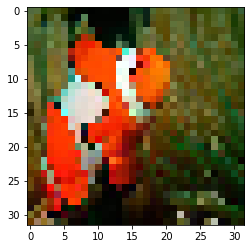

In [ ]:
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255

In [ ]:
np.argmax(model.predict(img),axis=1)

array([92])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CNNCifar100.jpynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CNNCifar100.jpynb to pdf
[NbConvertApp] Support files will be in CNNCifar100_files/
[NbConvertApp] Making directory ./CNNCifar100_files
[NbConvertApp] Making directory ./CNNCifar100_files
[NbConvertApp] Making directory ./CNNCifar100_files
[NbConvertApp] Writing 56451 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 124637 bytes to /content/drive/My Drive/CNNCifar100.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'